In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
data= pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data1= data.drop('Id',axis= 1)

In [6]:
data1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
l= LabelEncoder()
l

LabelEncoder()

In [8]:
data1['Species']= l.fit_transform(data1['Species'])
data1

# data1['Species'].replace({'Iris-setosa':'0','Iris-virginica':'1',"Iris-versicolor":'2'})
# data1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
X= data1.iloc[:,:4]
y= data1.iloc[:,4]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [10]:
sc= StandardScaler()
sc

StandardScaler()

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state=  30)

In [12]:
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [13]:
len(X_train)

105

In [14]:
len(X_test)

45

# Linear Regression

In [15]:
lr= LinearRegression()
lr

LinearRegression()

In [16]:
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred= lr.predict(X_test)

In [18]:
lr.score(X_test,y_test)

0.876178363442288

C:\Users\ASHISH KUMAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ASHISH KUMAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ASHISH KUMAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ASHISH KUMAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



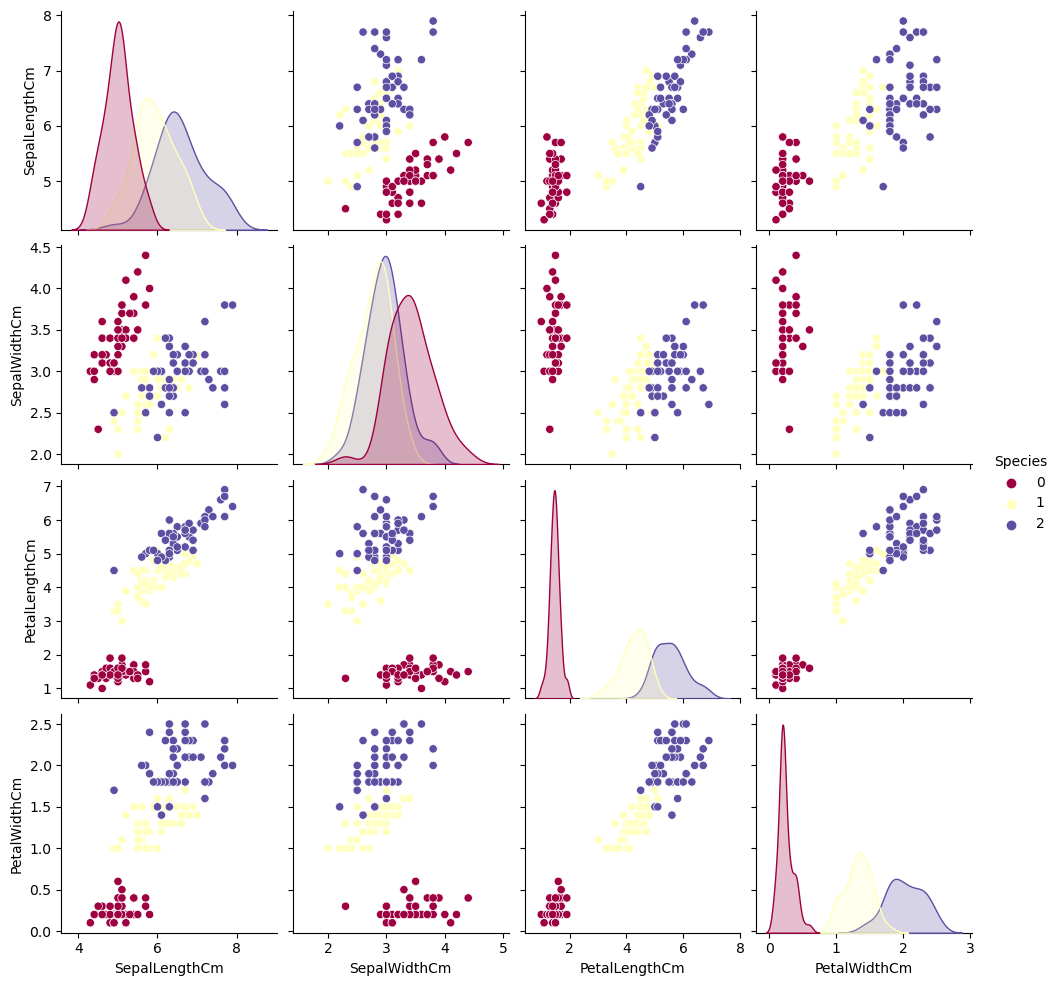

In [19]:
sns.pairplot(data1, hue= 'Species',palette= 'Spectral')
plt.show()

# Logistic Regression

In [20]:
lg= LogisticRegression()
lg

LogisticRegression()

In [21]:
lg.fit(X_train,y_train)

LogisticRegression()

In [22]:
lg.predict(X_test)

array([0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1,
       2])

In [23]:
lg.score(X_test,y_test)

0.8888888888888888

# L1 Regularization(Lasso)

In [24]:
ls= Lasso()
ls

Lasso()

In [25]:
ls.fit(X_train,y_train)

Lasso()

In [26]:
ls.predict(X_test)

array([0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714])

In [27]:
ls.score(X_test,y_test)

-0.05232862375719516

# L2 Regularization(Ridge)

In [28]:
l2= Ridge()
l2

Ridge()

In [29]:
l2.fit(X_train,y_train)

Ridge()

In [30]:
l2.predict(X_test)

array([-0.15422803, -0.08353885, -0.1003813 ,  1.58270399,  0.92353732,
        0.89702873,  1.44608539,  1.75074899,  0.99472172,  1.61312305,
       -0.1123841 ,  1.5560291 ,  0.78900254,  1.01981245, -0.08296102,
        1.00955913, -0.31359624, -0.1307232 , -0.07220694,  1.28137404,
        1.28687695, -0.1337214 , -0.19890385, -0.19698806,  1.82251023,
        1.8073439 ,  1.40366253,  1.87478314, -0.15597751,  1.08490675,
        1.63871935,  0.81625809,  1.67556114,  1.42891685,  2.03806184,
        1.7064885 ,  0.76599947,  1.50851866,  0.9713832 ,  1.39206853,
        1.85327399,  1.74532769, -0.3416869 ,  1.24578097,  1.57570062])

In [31]:
l2.score(X_test,y_test)

0.8753636075269029

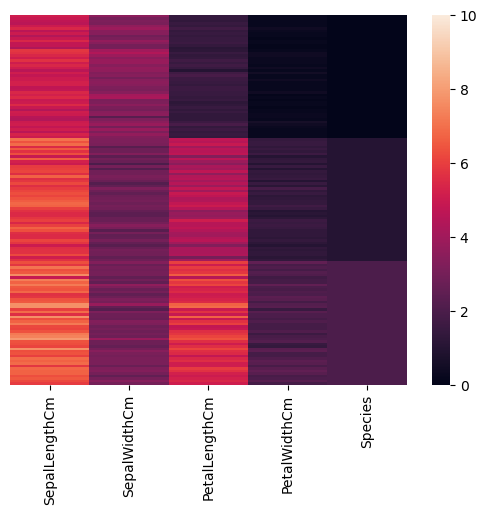

In [32]:
sns.heatmap(data1,yticklabels= False, vmax= 10, vmin= 0,annot= False)
plt.show()

<Axes: ylabel='count'>

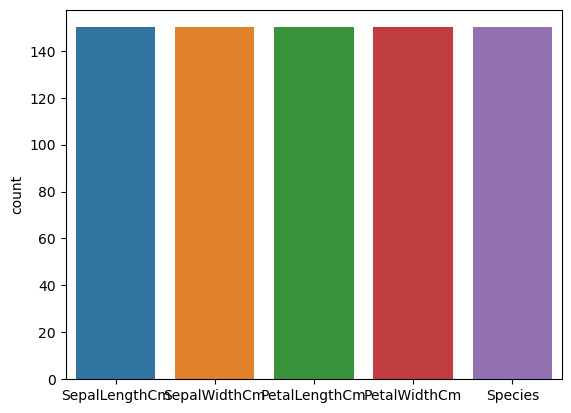

In [33]:
sns.countplot(data1)

In [34]:
from shapash.explainer.smart_explainer import SmartExplainer

In [35]:
xpl = SmartExplainer(model=lg)

In [40]:
app = xpl.run_app(title_story='Tips Dataset')

AttributeError: 'SmartExplainer' object has no attribute 'y_pred'